# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset.

Add any relevant insight for future modelling.

# Imports

In [60]:
%load_ext autoreload
%autoreload 2

import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [70]:
DATA_FOLDER = "../data/"
df = pd.read_csv(os.path.join(DATA_FOLDER, "raw/abalone.csv"))

## Preprocess

In [23]:
# Compute target
def compute_target(df):
    """
    Calculate the 'age' column in the DataFrame by adding 1.5 to the 'Rings'
    column, and remove the 'Rings' column from the DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing a 'Rings' column.

    Returns:
    pandas.DataFrame: A modified DataFrame with the 'Rings' column removed 
    and a new 'age' column.
    """
    df['age'] = df['Rings'] + 1.5
    df = df.drop(columns=['Rings'])
    return df

df = compute_target(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [30]:
# Encode categorical columns
def encode_sex(df):
    """
    Encode the 'Sex' column in the DataFrame using one-hot encoding, 
    and combine the resulting one-hot encoded columns with the original 
    DataFrame by concatenation.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing a 'Sex' column 
    to be one-hot encoded.

    Returns:
    pandas.DataFrame: A new DataFrame with the 'Sex' column encoded using 
    one-hot encoding.
    """

    one_hot = pd.get_dummies(df['Sex'])
    one_hot = one_hot.astype(int)
    data_one_hot = pd.concat([one_hot, df.drop(columns="Sex")], axis=1)
    return data_one_hot

df= encode_sex(df)

In [36]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [38]:
"""# save df_train processed
df_train.to_csv(DATA_FOLDER+"processed/train.csv")

# save df_test
df_test.to_csv(DATA_FOLDER+"processed/test.csv")"""

## EDA on train

In [39]:
df_train.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
2830,1,0,0,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815,10.5
925,0,1,0,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050,8.5
3845,0,0,1,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450,12.5
547,0,0,1,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,8.5
2259,1,0,0,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950,14.5


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 2830 to 860
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F               2923 non-null   int32  
 1   I               2923 non-null   int32  
 2   M               2923 non-null   int32  
 3   Length          2923 non-null   float64
 4   Diameter        2923 non-null   float64
 5   Height          2923 non-null   float64
 6   Whole weight    2923 non-null   float64
 7   Shucked weight  2923 non-null   float64
 8   Viscera weight  2923 non-null   float64
 9   Shell weight    2923 non-null   float64
 10  age             2923 non-null   float64
dtypes: float64(8), int32(3)
memory usage: 239.8 KB


In [41]:
df_train.isnull().sum()

F                 0
I                 0
M                 0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

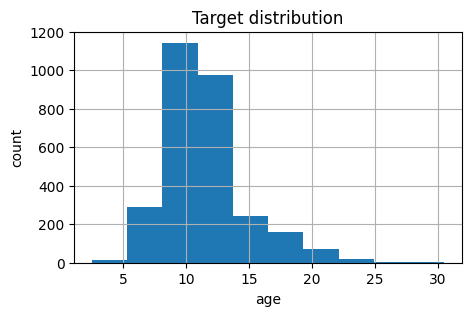

In [75]:
# Check target distribution

fig, ax = plt.subplots(figsize=(5, 3))

df_train['age'].hist(ax=ax)

plt.title('Target distribution')
ax.set_xlabel('age')
ax.set_ylabel('count');

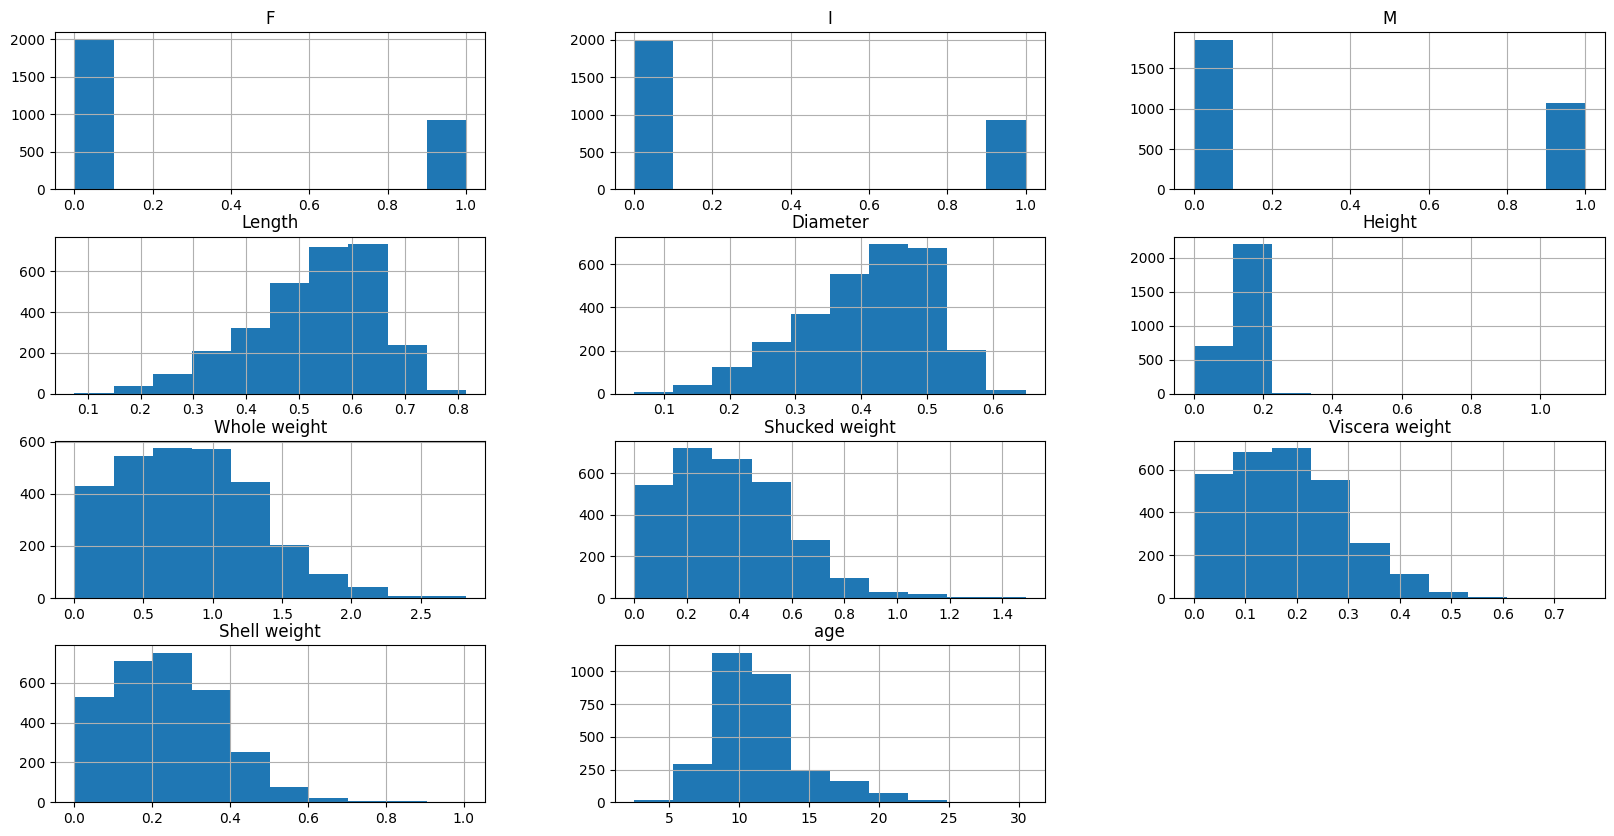

In [42]:
# Check distributions of columns
df_train.hist(figsize=(20, 10));

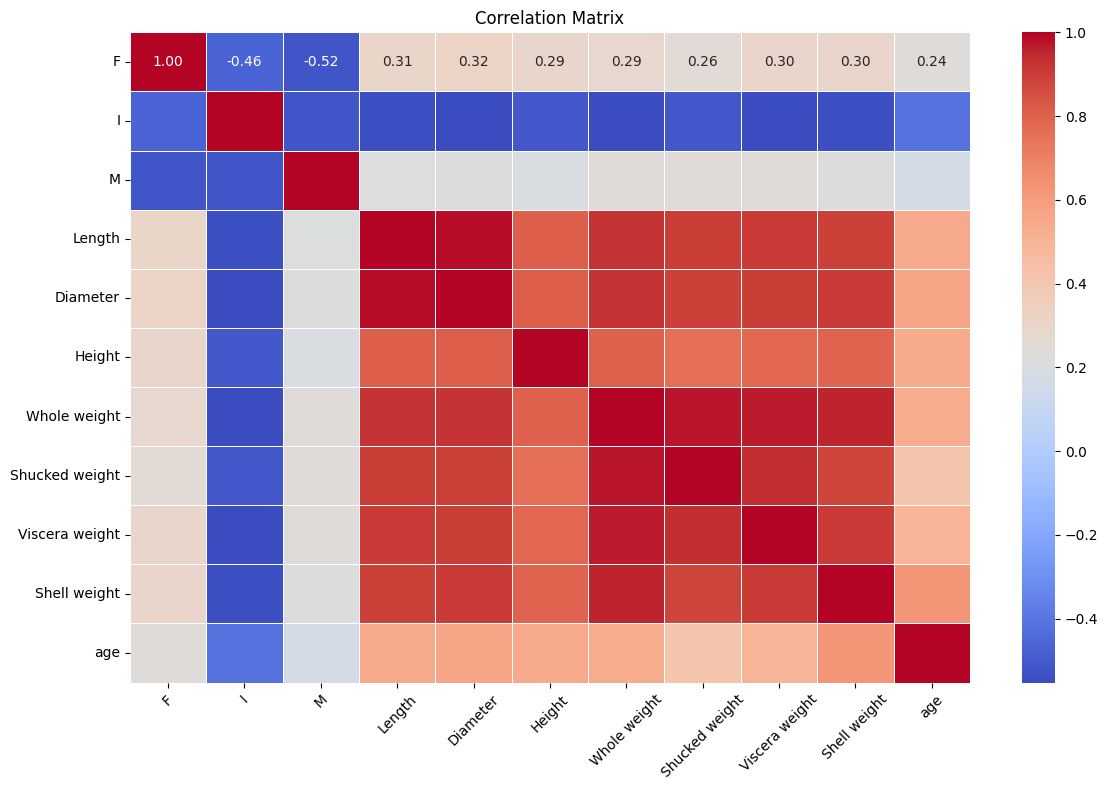

In [43]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the plot (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
# Check categorical column distribution
df_train[['I', 'M', 'F']].count()

I    2923
M    2923
F    2923
dtype: int64

C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

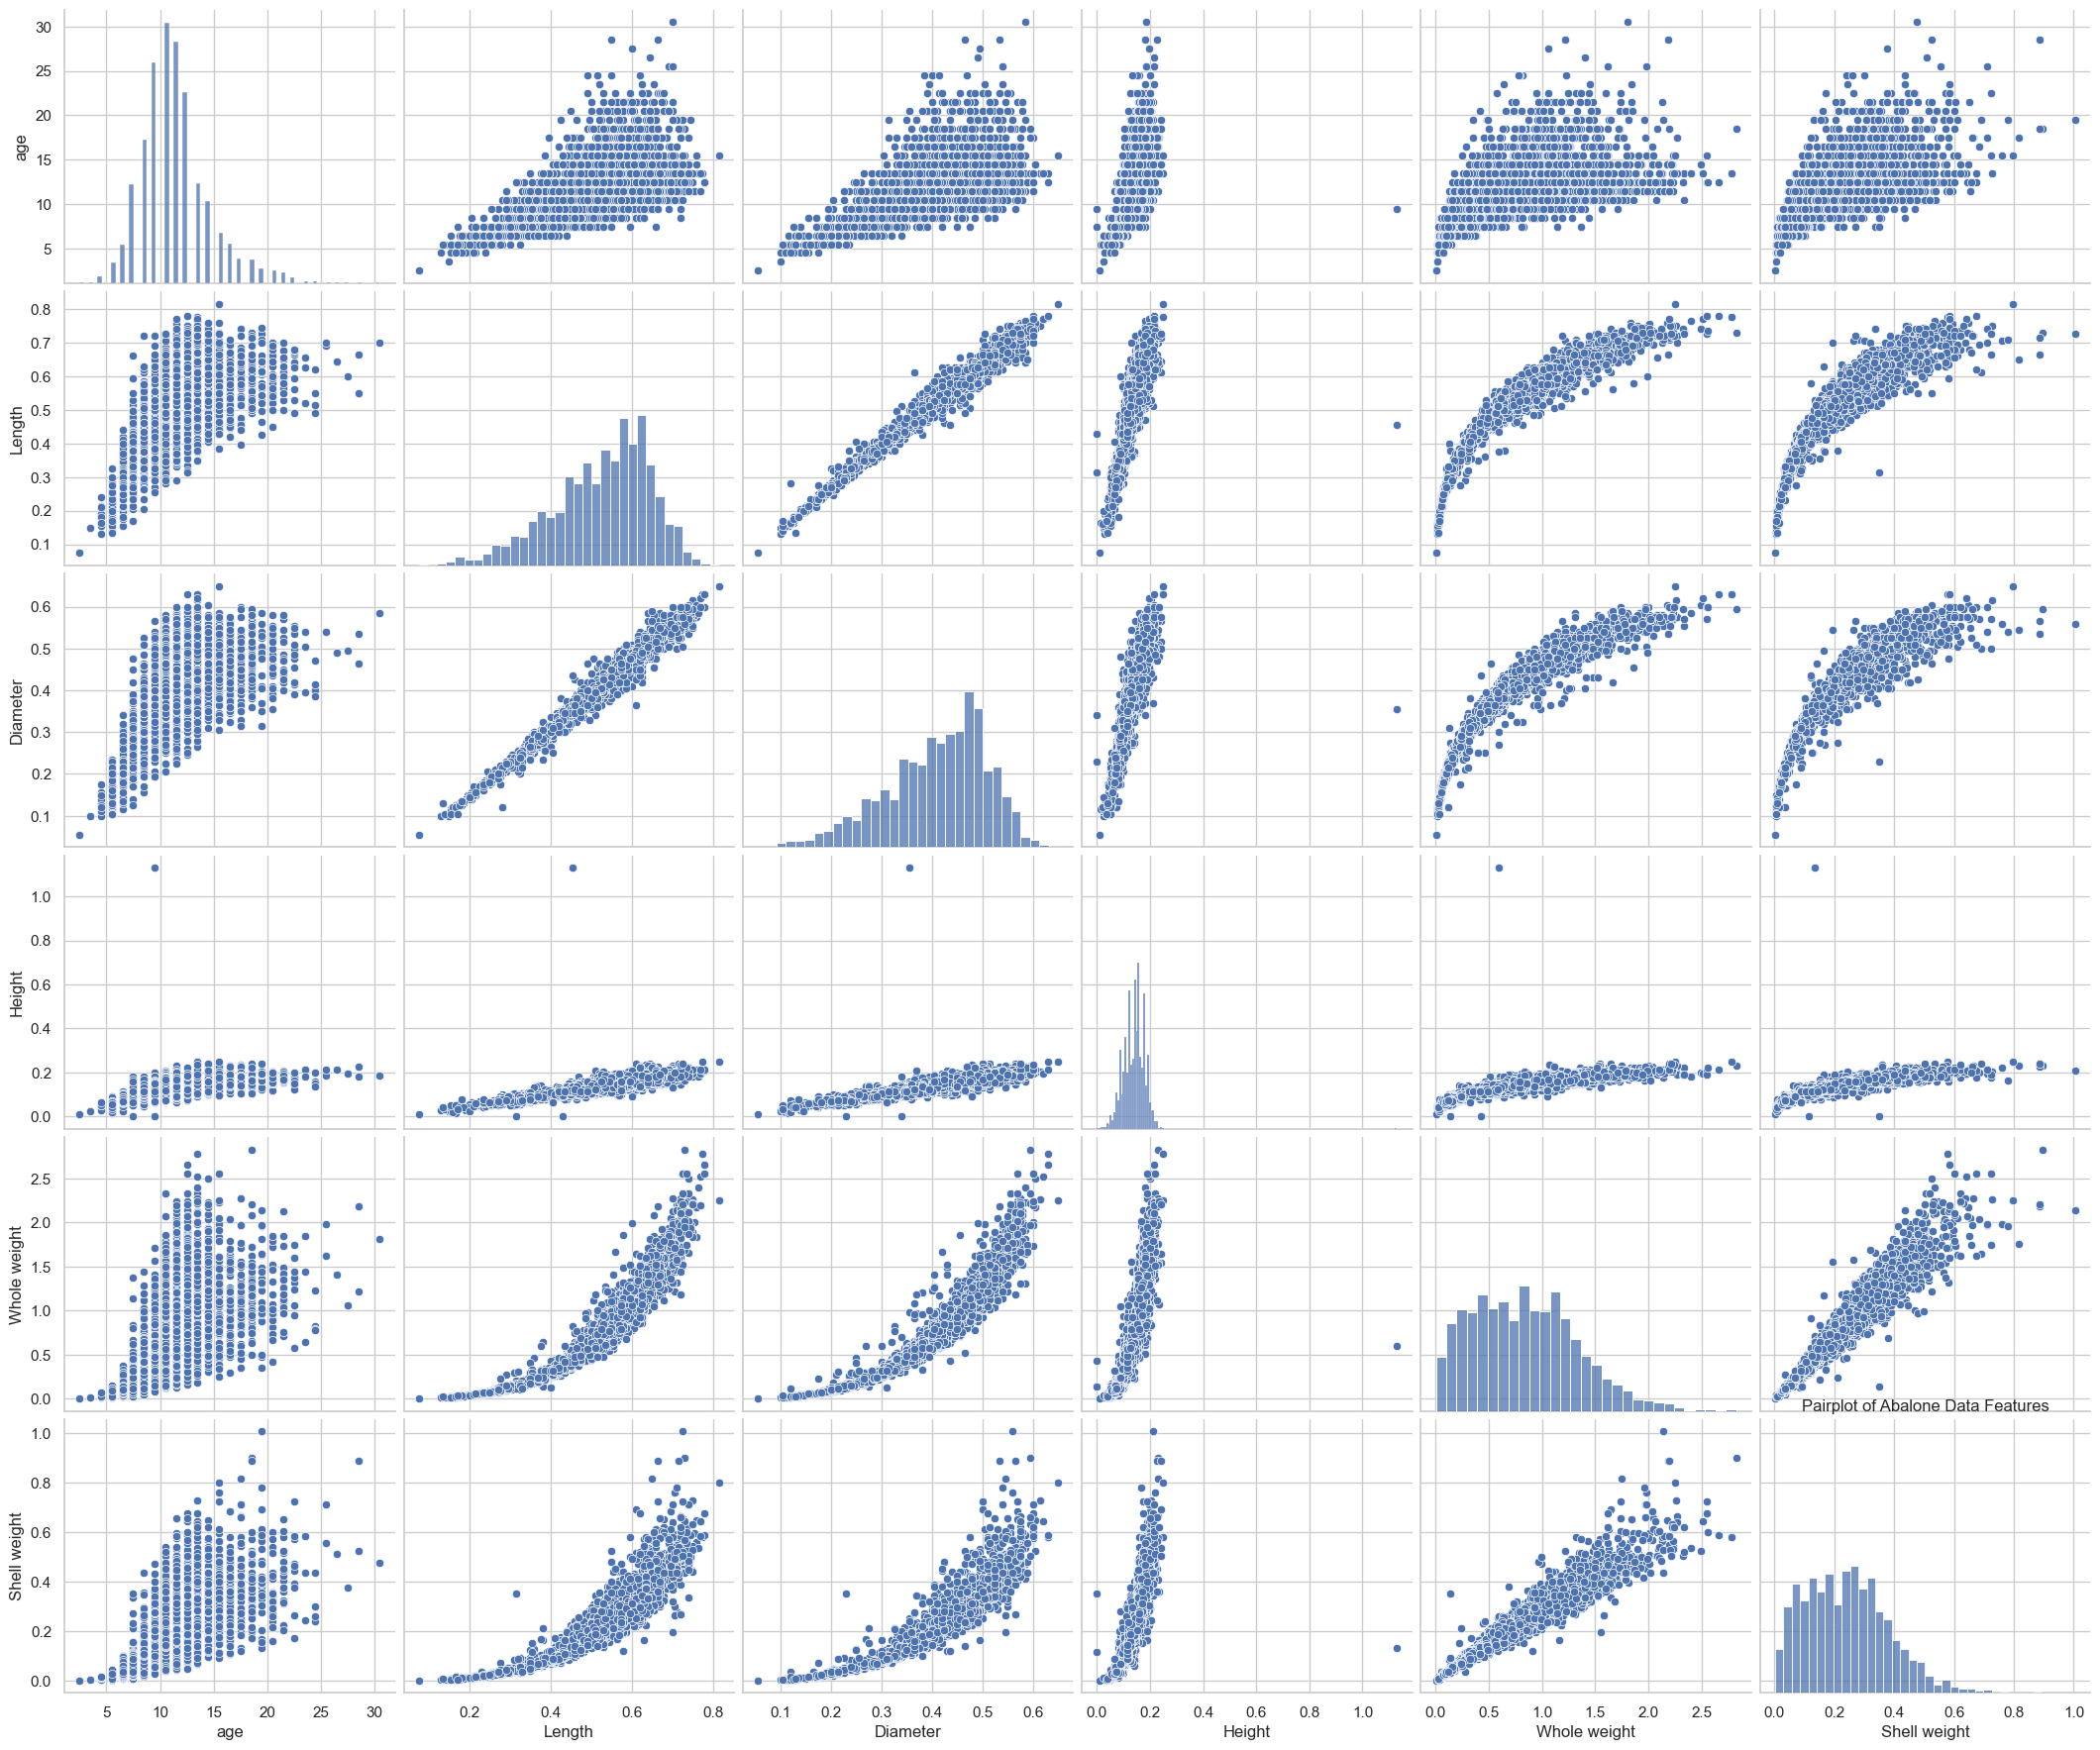

In [78]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the pairplot
sns.pairplot(df_train, vars=[
    'age', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'
    ],
      height=3, aspect=1.2)

# Set the title
plt.title("Pairplot of Abalone Data Features")

# Display the plot
plt.show()